# Notebook for finding # of seasonal HAIL_MAX2D grids that meet certain thresholds

### Import necessary libraries

In [74]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import statistics
import matplotlib
import matplotlib.patheffects as pe

## Import WRF HIST, mid- and end-FUTR RCP 4.5, 8.5 files (resampled to daily max 12Z-12Z). Saved to /home/scratch/jgoodin/convective_daily_max_resamples

In [2]:
hist = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/hist_daily_max_hail_inches.nc') #Open hist daily max .nc file 
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_4p5_daily_max_hail_inches.nc') #Open mid-FUTR 4.5 daily max .nc file 
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_8p5_daily_max_hail_inches.nc') #Open mid-FUTR 8.5 daily max .nc file 
end4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_4p5_daily_max_hail_inches.nc') #Open end-FUTR 4.5 daily max .nc file 
end8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_8p5_daily_max_hail_inches.nc') #Open end-FUTR 8.5 daily max .nc file

In [3]:
end8p5 #Test print one dataset- make sure daily data are returned

<xarray.Dataset>
Dimensions:     (Time: 5478, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 2085-09-30T12:00:00 ... 2100-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 ...

### Convert each file to units of in (provided by dataset in m)

In [4]:
hist = hist.HAIL_MAX2D * 39.3701
mid4p5 = mid4p5.HAIL_MAX2D * 39.3701
mid8p5 = mid8p5.HAIL_MAX2D * 39.3701 #Convert to in
end4p5 = end4p5.HAIL_MAX2D * 39.3701
end8p5 = end8p5.HAIL_MAX2D * 39.3701

In [15]:
hist.max()

<xarray.DataArray 'HAIL_MAX2D' ()>
array(2.28225636)

## Resample each climate epoch by season

In [17]:
hist_seasonal = hist.groupby('Time.season')
mid4p5_seasonal = mid4p5.groupby('Time.season')
mid8p5_seasonal = mid8p5.groupby('Time.season') #Use groupby to resample by season- returns data array groupy by with four column titles for each season
end4p5_seasonal = end4p5.groupby('Time.season')
end8p5_seasonal = end8p5.groupby('Time.season')

In [18]:
end8p5_seasonal #Test print one epoch- should return data array groupby of 4 seasons (DJF, MAM, JJA, SON)

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [21]:
hist_seasonal['DJF'].values.max() #Test statistics of one climate epoch

2.1564271

In [26]:
end8p5_seasonal['DJF'].shape #Check shape (will have to select one season)- returns (total # of days in 3-month season x 899 x 1399)

(1353, 899, 1399)

## Select by season for plotting

#### NOTE: will have to use indexing method since you can't sel a data array groupby

In [27]:
hist_DJF = hist_seasonal['DJF'].values
mid4p5_DJF = mid4p5_seasonal['DJF'].values
mid8p5_DJF = mid8p5_seasonal['DJF'].values #Sel by boreal winter (DJF)
end4p5_DJF = end4p5_seasonal['DJF'].values
end8p5_DJF = end8p5_seasonal['DJF'].values

hist_MAM = hist_seasonal['MAM'].values
mid4p5_MAM = mid4p5_seasonal['MAM'].values
mid8p5_MAM = mid8p5_seasonal['MAM'].values #Sel by boreal spring (MAM)
end4p5_MAM = end4p5_seasonal['MAM'].values
end8p5_MAM = end8p5_seasonal['MAM'].values

hist_JJA = hist_seasonal['JJA'].values
mid4p5_JJA = mid4p5_seasonal['JJA'].values
mid8p5_JJA = mid8p5_seasonal['JJA'].values #Sel by boreal summer (JJA)
end4p5_JJA = end4p5_seasonal['JJA'].values
end8p5_JJA = end8p5_seasonal['JJA'].values

hist_SON = hist_seasonal['SON'].values
mid4p5_SON = mid4p5_seasonal['SON'].values
mid8p5_SON = mid8p5_seasonal['SON'].values #Sel by boreal fall (SON)
end4p5_SON = end4p5_seasonal['SON'].values
end8p5_SON = end8p5_seasonal['SON'].values

## Convert HAIL_MAX2D data from each climate epoch to a 1D array

#### NOTE: We don't care about lat/lon data. We only want counts of grids that meet each bin threshold (bins specified below)

In [29]:
hist_DJF_1d = hist_DJF.ravel()
mid4p5_DJF_1d = mid4p5_DJF.ravel()
mid8p5_DJF_1d = mid8p5_DJF.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array for DJF
end4p5_DJF_1d = end4p5_DJF.ravel()
end8p5_DJF_1d = end8p5_DJF.ravel()

hist_MAM_1d = hist_MAM.ravel()
mid4p5_MAM_1d = mid4p5_MAM.ravel()
mid8p5_MAM_1d = mid8p5_MAM.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array for MAM
end4p5_MAM_1d = end4p5_MAM.ravel()
end8p5_MAM_1d = end8p5_MAM.ravel()

hist_JJA_1d = hist_JJA.ravel()
mid4p5_JJA_1d = mid4p5_JJA.ravel()
mid8p5_JJA_1d = mid8p5_JJA.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array for JJA
end4p5_JJA_1d = end4p5_JJA.ravel()
end8p5_JJA_1d = end8p5_JJA.ravel()

hist_SON_1d = hist_SON.ravel()
mid4p5_SON_1d = mid4p5_SON.ravel()
mid8p5_SON_1d = mid8p5_SON.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array for SON
end4p5_SON_1d = end4p5_SON.ravel()
end8p5_SON_1d = end8p5_SON.ravel()

In [30]:
len(hist_DJF_1d) #Check length of 1D array for one season of one climate epoch

1702927154

## Remove all values from arrays ≠ 0

In [31]:
hist_DJF_nonzero = hist_DJF_1d[hist_DJF_1d != 0]
mid4p5_DJF_nonzero = mid4p5_DJF_1d[mid4p5_DJF_1d != 0]
mid8p5_DJF_nonzero = mid8p5_DJF_1d[mid8p5_DJF_1d != 0] #Select all DJF values from each climate epoch that are ≠ 0
end4p5_DJF_nonzero = end4p5_DJF_1d[end4p5_DJF_1d != 0] 
end8p5_DJF_nonzero = end8p5_DJF_1d[end8p5_DJF_1d != 0]

hist_MAM_nonzero = hist_MAM_1d[hist_MAM_1d != 0]
mid4p5_MAM_nonzero = mid4p5_MAM_1d[mid4p5_MAM_1d != 0]
mid8p5_MAM_nonzero = mid8p5_MAM_1d[mid8p5_MAM_1d != 0] #Select all MAM values from each climate epoch that are ≠ 0
end4p5_MAM_nonzero = end4p5_MAM_1d[end4p5_MAM_1d != 0] 
end8p5_MAM_nonzero = end8p5_MAM_1d[end8p5_MAM_1d != 0]

hist_JJA_nonzero = hist_JJA_1d[hist_JJA_1d != 0]
mid4p5_JJA_nonzero = mid4p5_JJA_1d[mid4p5_JJA_1d != 0]
mid8p5_JJA_nonzero = mid8p5_JJA_1d[mid8p5_JJA_1d != 0] #Select all JJA values from each climate epoch that are ≠ 0
end4p5_JJA_nonzero = end4p5_JJA_1d[end4p5_JJA_1d != 0] 
end8p5_JJA_nonzero = end8p5_JJA_1d[end8p5_JJA_1d != 0]

hist_SON_nonzero = hist_SON_1d[hist_SON_1d != 0]
mid4p5_SON_nonzero = mid4p5_SON_1d[mid4p5_SON_1d != 0]
mid8p5_SON_nonzero = mid8p5_SON_1d[mid8p5_SON_1d != 0] #Select all SON values from each climate epoch that are ≠ 0
end4p5_SON_nonzero = end4p5_SON_1d[end4p5_SON_1d != 0]
end8p5_SON_nonzero = end8p5_SON_1d[end8p5_SON_1d != 0]

In [32]:
len(hist_DJF_nonzero) #Check length of same season/epoch- make sure len is less than len above

405576998

## Use scipy.stats library to create histogram output for each season of each climate epoch. Returns bins specified by user and grid counts per bin

#### **These are plotting variables

### DJF

In [64]:
hist_DJF_count, hist_DJF_bins = scipy.histogram(hist_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
mid4p5_DJF_count, mid4p5_DJF_bins = scipy.histogram(mid4p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
mid8p5_DJF_count, mid8p5_DJF_bins = scipy.histogram(mid8p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]) #Pass 0.25" bins to each epoch
end4p5_DJF_count, end4p5_DJF_bins = scipy.histogram(end4p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
end8p5_DJF_count, end8p5_DJF_bins = scipy.histogram(end8p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])

/tmp/ipykernel_39328/1755804269.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_DJF_count, hist_DJF_bins = scipy.histogram(hist_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
/tmp/ipykernel_39328/1755804269.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_DJF_count, mid4p5_DJF_bins = scipy.histogram(mid4p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
/tmp/ipykernel_39328/1755804269.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_DJF_count, mid8p5_DJF_bins = scipy.histogram(mid8p5_DJF_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]) #Pass 0.25" bins to each epoch
/tmp/ipykernel_39328/1755804269.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use

### Check some stats

In [35]:
hist_DJF_count #Test check grid counts for one epoch

array([138286189, 136492234,  85183073,  36820182,   7866993,    882832,
           45277,       218,         0])

In [37]:
end8p5_DJF_count #Test check grid counts for another epoch

array([141103328, 151345317,  85620132,  42339479,  10974829,   1762659,
          159322,      3306,         0])

In [38]:
hist_DJF_check = hist_DJF_nonzero[hist_DJF_nonzero >= 1.5] #Check grid counts that meets certain thresholds
len(hist_DJF_check) #Check grid counts

928327

In [39]:
end8p5_DJF_check = end8p5_DJF_nonzero[end8p5_DJF_nonzero >= 1.5] #Check same threshold for different epoch
len(end8p5_DJF_check) #Check grid counts

1925287

In [40]:
len(hist_DJF_check) - len(end8p5_DJF_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results

-996960

In [115]:
np.percentile(hist_DJF_bins, 5) #Print out 5th percentile of array

0.35

In [116]:
np.percentile(hist_DJF_bins, 95) #Print out 95th percentile of array

2.15

## Concatenate DJF arrays for each climate epoch into one array to find stats of whole DJF dataset (mean, percentiles, etc.)

### **Might have to do this in several steps since concatenate method only takes three arguments

In [144]:
#djf = np.concatenate((hist_DJF_nonzero, mid4p5_DJF_nonzero, mid8p5_DJF_nonzero)) #First concatenate DJF HIST - mid-FUTR 8.5

In [136]:
#len(djf)

1197774411

In [137]:
#djf2 = np.concatenate((end4p5_DJF_nonzero, end8p5_DJF_nonzero)) #Second, concatenate both end-FUTR DJF

In [138]:
#len(djf2)

860460339

In [139]:
#djf_final = ((djf, djf2)) #Combine the above arrays so DJF of all climate epochs are concatenated into one 1D array

In [140]:
#len(djf_final)

2

### Create histogram output for DJF total over all climate epochs

In [142]:
#total_DJF_count, total_DJF_bins = scipy.histogram(djf_final, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])

### MAM

In [98]:
hist_MAM_count, hist_MAM_bins = scipy.histogram(hist_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
mid4p5_MAM_count, mid4p5_MAM_bins = scipy.histogram(mid4p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
mid8p5_MAM_count, mid8p5_MAM_bins = scipy.histogram(mid8p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]) #Pass 0.25" bins to each epoch
end4p5_MAM_count, end4p5_MAM_bins = scipy.histogram(end4p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
end8p5_MAM_count, end8p5_MAM_bins = scipy.histogram(end8p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])

/tmp/ipykernel_39328/183218057.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_MAM_count, hist_MAM_bins = scipy.histogram(hist_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
/tmp/ipykernel_39328/183218057.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_MAM_count, mid4p5_MAM_bins = scipy.histogram(mid4p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
/tmp/ipykernel_39328/183218057.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_MAM_count, mid8p5_MAM_bins = scipy.histogram(mid8p5_MAM_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]) #Pass 0.25" bins to each epoch
/tmp/ipykernel_39328/183218057.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use num

### Check stats here

In [41]:
hist_MAM_count #Test check grid counts for one epoch

array([151432681, 168892393,  96386035,  46660962,  14427371,   2669444,
          229325,      3200,         0])

In [42]:
end8p5_MAM_count #Test check grid counts for another epoch

array([138411968, 158198784,  91744838,  49575016,  18777270,   4626389,
          535429,     14541,         2])

In [43]:
hist_MAM_check = hist_MAM_nonzero[hist_MAM_nonzero >= 1.5] #Check grid counts that meets certain thresholds
len(hist_MAM_check) #Check grid counts

2901969

In [44]:
end8p5_MAM_check = end8p5_MAM_nonzero[end8p5_MAM_nonzero >= 1.5] #Check same threshold for different epoch
len(end8p5_MAM_check) #Check grid counts

5176361

In [45]:
len(hist_MAM_check) - len(end8p5_MAM_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results

-2274392

### JJA

In [46]:
hist_JJA_count, hist_JJA_bins = scipy.histogram(hist_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
mid4p5_JJA_count, mid4p5_JJA_bins = scipy.histogram(mid4p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
mid8p5_JJA_count, mid8p5_JJA_bins = scipy.histogram(mid8p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #Pass 0.25" bins to each epoch
end4p5_JJA_count, end4p5_JJA_bins = scipy.histogram(end4p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
end8p5_JJA_count, end8p5_JJA_bins = scipy.histogram(end8p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])

/tmp/ipykernel_39328/421610568.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_JJA_count, hist_JJA_bins = scipy.histogram(hist_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
/tmp/ipykernel_39328/421610568.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_JJA_count, mid4p5_JJA_bins = scipy.histogram(mid4p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
/tmp/ipykernel_39328/421610568.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_JJA_count, mid8p5_JJA_bins = scipy.histogram(mid8p5_JJA_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #Pass 0.25" bins to each epoch
/tmp/ipykernel_39328/421610568.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.

### More stats

In [47]:
hist_JJA_count #Test check grid counts for one epoch

array([131641276, 128207295,  89328595,  66665057,  29590885,   7988422,
          729769,     12801,         4])

In [48]:
end8p5_JJA_count #Test check grid counts for another epoch

array([116490212, 109359770,  74242387,  56944705,  28093872,   9196575,
         1170476,     36260,        24])

In [49]:
hist_JJA_check = hist_JJA_nonzero[hist_JJA_nonzero >= 1.5] #Check grid counts that meets certain thresholds
len(hist_JJA_check) #Check grid counts

8730996

In [50]:
end8p5_JJA_check = end8p5_JJA_nonzero[end8p5_JJA_nonzero >= 1.5] #Check same threshold for different epoch
len(end8p5_JJA_check) #Check grid counts

10403335

In [51]:
len(hist_JJA_check) - len(end8p5_JJA_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results

-1672339

### SON

In [107]:
hist_SON_count, hist_SON_bins = scipy.histogram(hist_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
mid4p5_SON_count, mid4p5_SON_bins = scipy.histogram(mid4p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
mid8p5_SON_count, mid8p5_SON_bins = scipy.histogram(mid8p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #Pass 0.25" bins to each epoch
end4p5_SON_count, end4p5_SON_bins = scipy.histogram(end4p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
end8p5_SON_count, end8p5_SON_bins = scipy.histogram(end8p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])

/tmp/ipykernel_39328/2205427801.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_SON_count, hist_SON_bins = scipy.histogram(hist_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
/tmp/ipykernel_39328/2205427801.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_SON_count, mid4p5_SON_bins = scipy.histogram(mid4p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25])
/tmp/ipykernel_39328/2205427801.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_SON_count, mid8p5_SON_bins = scipy.histogram(mid8p5_SON_nonzero, bins = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #Pass 0.25" bins to each epoch
/tmp/ipykernel_39328/2205427801.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0

### Statssssssss

In [ ]:
hist_SON_count #Test check grid counts for one epoch

In [ ]:
end8p5_SON_count #Test check grid counts for another epoch

In [ ]:
hist_SON_check = hist_SON_nonzero[hist_SON_nonzero >= 1.5] #Check grid counts that meets certain thresholds
len(hist_SON_check) #Check grid counts

In [ ]:
end8p5_SON_check = end8p5_SON_nonzero[end8p5_SON_nonzero >= 1.5] #Check same threshold for different epoch
len(end8p5_SON_check) #Check grid counts

In [ ]:
len(hist_SON_check) - len(end8p5_SON_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results

## Plot 1D data as line graphs (one season at a time)

### NOTE: might need to get rid of last bin for some seasons of some climate epochs to eliminate vertical lines

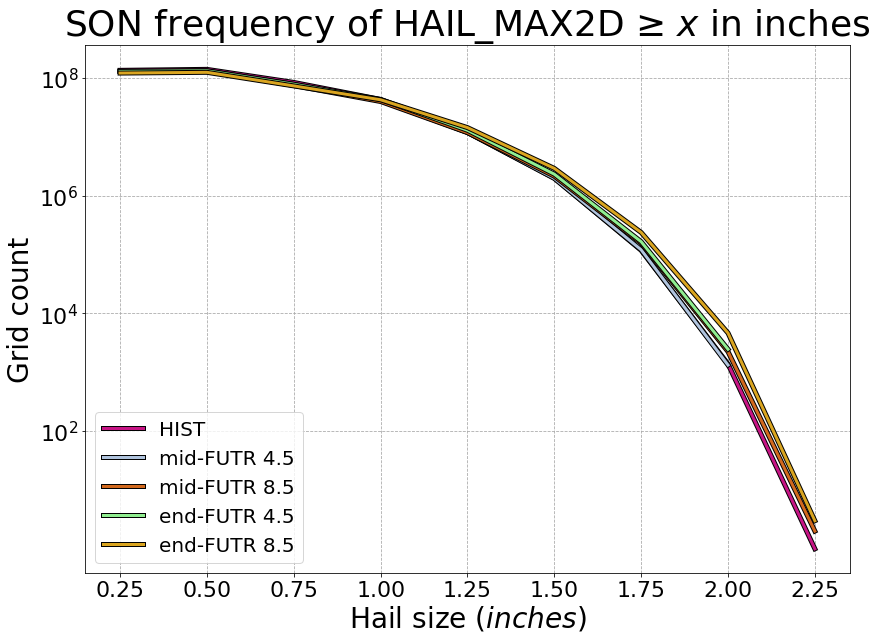

In [109]:
fig, ax = plt.subplots(figsize = (12, 9))
hist_plt = plt.plot(hist_SON_bins[0:len(hist_SON_bins) -  1], hist_SON_count, color = 'mediumvioletred', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "HIST")
mid4p5_plt = plt.plot(mid4p5_SON_bins[0:len(mid4p5_SON_bins) -  1], mid4p5_SON_count, color = 'lightsteelblue', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 4.5")
mid8p5_plt = plt.plot(mid8p5_SON_bins[0:len(mid8p5_SON_bins) -  1], mid8p5_SON_count, color = 'chocolate', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 8.5")
end4p5_plt = plt.plot(end4p5_SON_bins[0:len(end4p5_SON_bins) -  1], end4p5_SON_count, color = 'lightgreen', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")
end8p5_plt = plt.plot(end8p5_SON_bins[0:len(end8p5_SON_bins) -  1], end8p5_SON_count, color = 'goldenrod', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 8.5")
ax.set_yscale('log')
ax.set_yticks([(10**2), (10**4), (10**6), (10**8)])
plt.grid(color = 'darkgray', linestyle = '--')
ax.set_title('SON frequency of HAIL_MAX2D ≥ $x$ in inches', fontsize = 36)
ax.set_xlabel('Hail size ($inches$)', fontsize = 28)
ax.set_ylabel('Grid count', fontsize = 28)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(fontsize=20, loc='lower left')
plt.tight_layout()
plt.savefig('/home/scratch/jgoodin/SON_grid_counts.png')
plt.show()